# import libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import recall_score,precision_score,f1_score

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 1.Problem statement

# 2. Read the dataset

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,500,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,102,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 3.EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [13]:
268/(500+268)

0.3489583333333333

<AxesSubplot:xlabel='Outcome', ylabel='count'>

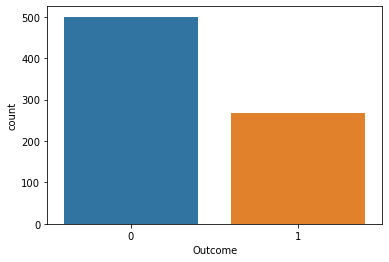

In [6]:
sns.countplot(df['Outcome'])

# 4.Splitting the dataset

In [7]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']

In [8]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,500,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,102
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=30,stratify=y)

In [12]:
# without stratify
ytrain.value_counts()

0    370
1    206
Name: Outcome, dtype: int64

In [14]:
206/(370+206)

0.3576388888888889

In [16]:
# with stratify
ytrain.value_counts()

0    375
1    201
Name: Outcome, dtype: int64

In [17]:
201/(201+375)

0.3489583333333333

# 5.Model building and training

In [18]:
log_model = LogisticRegression()
log_model.fit(xtrain,ytrain)

LogisticRegression()

# 6.Model evaluation

In [27]:
# Testing data evaluation
ypredtest = log_model.predict(xtest)

Accuracy = accuracy_score(ytest,ypredtest)
print('Accuracy:',Accuracy)

Confusion_matrix = confusion_matrix(ytest,ypredtest)
print('Confusion_matrix: \n',Confusion_matrix)

Classification_report = classification_report(ytest,ypredtest)
print('Classification_report: \n',Classification_report)

Recall = recall_score(ytest,ypredtest)
print('Recall:',Recall)

Precision = precision_score(ytest,ypredtest)
print('Precision:',Precision)

F1_score = f1_score(ytest,ypredtest)
print('F1_score:',F1_score)

Accuracy: 0.765625
Confusion_matrix: 
 [[108  17]
 [ 28  39]]
Classification_report: 
               precision    recall  f1-score   support

           0       0.79      0.86      0.83       125
           1       0.70      0.58      0.63        67

    accuracy                           0.77       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.76      0.77      0.76       192

Recall: 0.582089552238806
Precision: 0.6964285714285714
F1_score: 0.6341463414634148


In [20]:
ypredtest[:10]

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [21]:
ytest[:10]

515    1
394    1
226    0
192    1
436    0
719    1
686    0
126    0
287    1
457    0
Name: Outcome, dtype: int64

In [ ]:
 [[108  17]
 [ 28  39]]

In [28]:
TP = 39
TN = 108
FN = 28
FP = 17

In [29]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Accuracy

0.765625

In [30]:
Recall = TP/(TP+FN)
Recall

0.582089552238806

In [31]:
Precision = TP/(TP+FP)
Precision

0.6964285714285714

In [32]:
F1_score = (2*Precision*Recall)/(Precision+Recall)
F1_score

0.6341463414634148

In [33]:
# Training data evaluation
ypredtrain = log_model.predict(xtrain)

Accuracy = accuracy_score(ytrain,ypredtrain)
print('Accuracy:',Accuracy)

Confusion_matrix = confusion_matrix(ytrain,ypredtrain)
print('Confusion_matrix: \n',Confusion_matrix)

Classification_report = classification_report(ytrain,ypredtrain)
print('Classification_report: \n',Classification_report)

Recall = recall_score(ytrain,ypredtrain)
print('Recall:',Recall)

Precision = precision_score(ytrain,ypredtrain)
print('Precision:',Precision)

F1_score = f1_score(ytrain,ypredtrain)
print('F1_score:',F1_score)

Accuracy: 0.75
Confusion_matrix: 
 [[329  46]
 [ 98 103]]
Classification_report: 
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       375
           1       0.69      0.51      0.59       201

    accuracy                           0.75       576
   macro avg       0.73      0.69      0.70       576
weighted avg       0.74      0.75      0.74       576

Recall: 0.5124378109452736
Precision: 0.6912751677852349
F1_score: 0.5885714285714285
